Due to noise objects may not be detected clearly. So to deal with that, we do morphological image processing.

Erosion: This operation "erodes" the shape in the image. It can smooth out the rough edges of the image.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('airplane40.tif', 0)

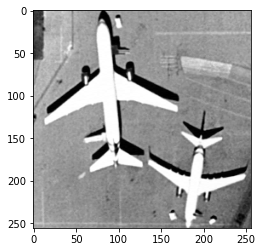

In [3]:
plt.imshow(img, cmap="gray")

In [4]:
ret, thres = cv2.threshold(img, 165, 255, 0) # the '0' paramters tells to keep value below 165 as black and above 165 as white.

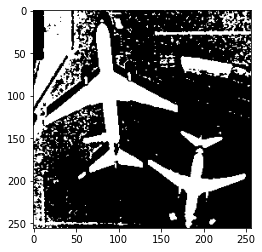

In [5]:
plt.imshow(thres, cmap="gray")

In [6]:
kernel = np.ones((5,5), np.uint8) # by default agar float values aaye so for that, we write uint8.

In [7]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## Erosion

In [8]:
erosion = cv2.erode(thres, kernel, iterations=1)

In [9]:
erosion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<ipython-input-10-5d48e0660698>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131)


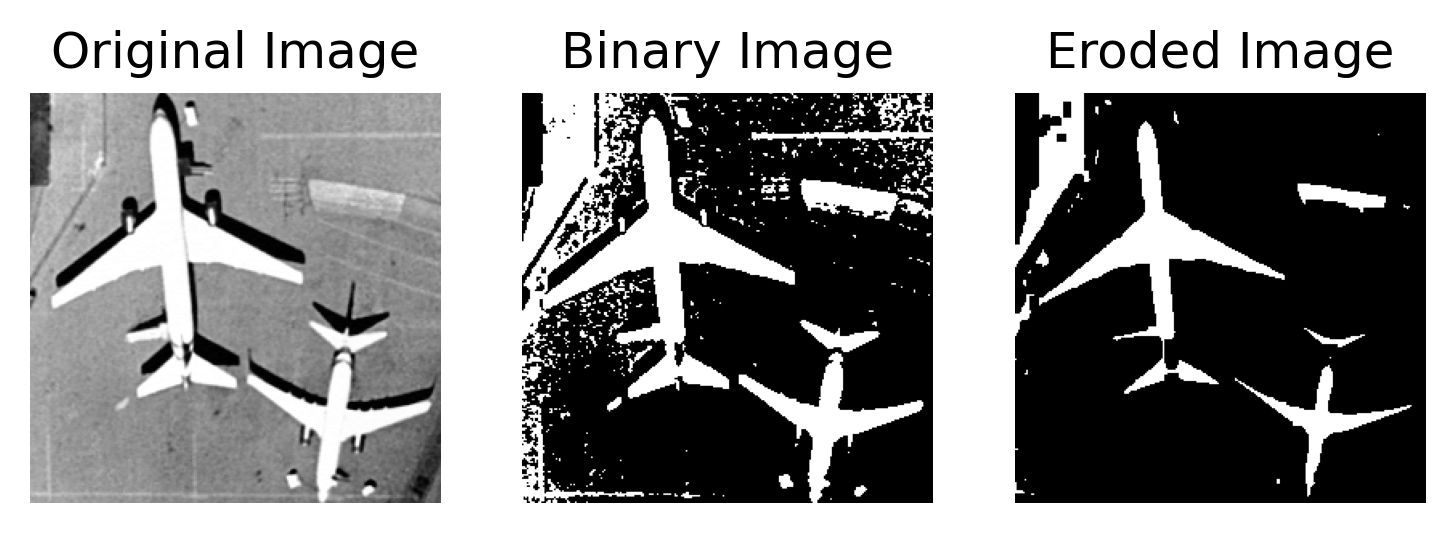

In [10]:
fig = plt.figure(dpi=300)
plt.subplot(131)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(131)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(thres, 'gray')
plt.axis('off')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(erosion, 'gray')
plt.axis('off')
plt.title('Eroded Image')
plt.show()



## Dilation

In [11]:
dilation = cv2.dilate(thres, kernel, iterations=1)


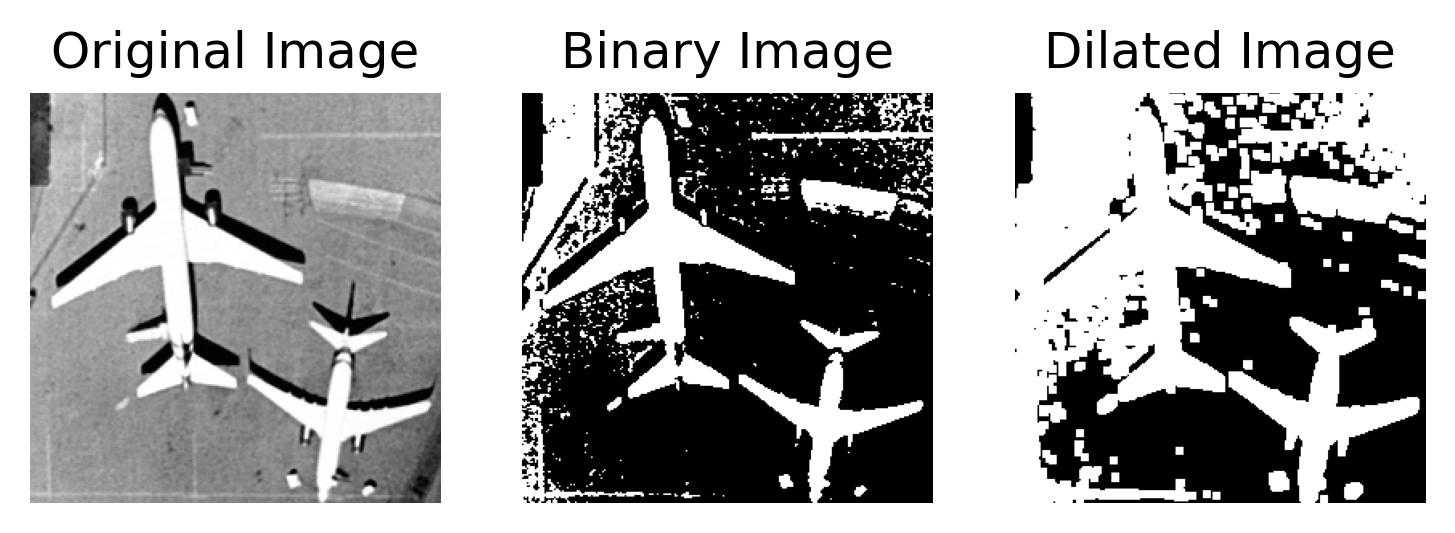

In [12]:
fig = plt.figure(dpi=300)

plt.subplot(131)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(thres, 'gray')
plt.axis('off')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(dilation, 'gray')
plt.axis('off')
plt.title('Dilated Image')
plt.show()



#### So, if any part of the kernel fits (i.e. in 'hit' case) also, the center pixel becomes foreground. Size of foreground is increased. But the noise is enhanced. 

### But we want original image with no noise. So, we perform erosion and then dilation.

In [13]:
dilation_after_erosion = cv2.dilate(erosion, kernel, iterations=1)


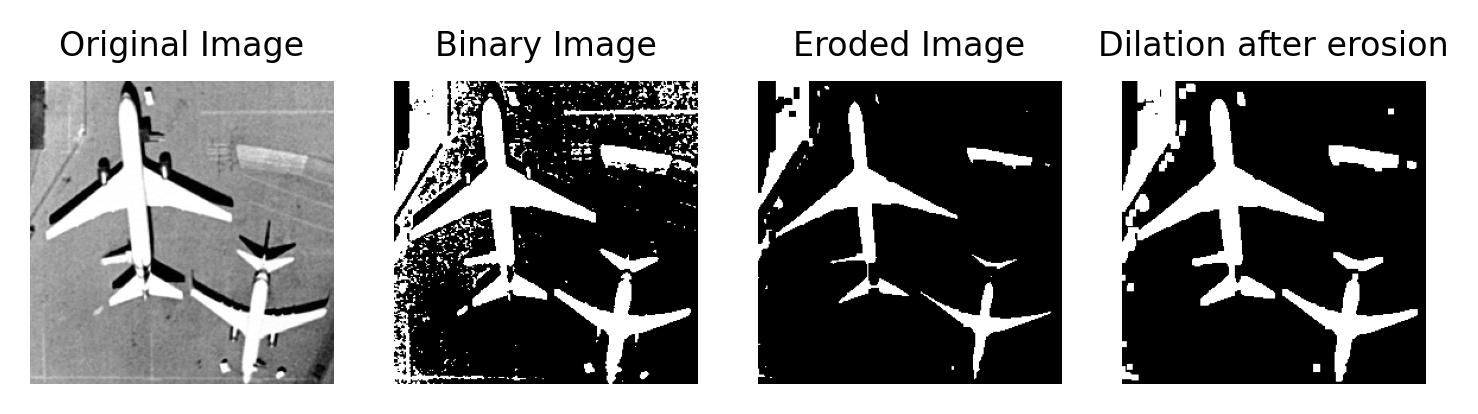

In [14]:
fig = plt.figure(dpi=300)
plt.subplot(141)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image', fontsize=8)

plt.subplot(142)
plt.imshow(thres, 'gray')
plt.axis('off')
plt.title('Binary Image', fontsize=8)

plt.subplot(143)
plt.imshow(erosion, 'gray')
plt.axis('off')
plt.title('Eroded Image', fontsize=8)

plt.subplot(144)
plt.imshow(dilation_after_erosion, 'gray')
plt.axis('off')
plt.title('Dilation after erosion', fontsize=8)
plt.show()



### Opening: Dilation after erosion

In [15]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations = 1)

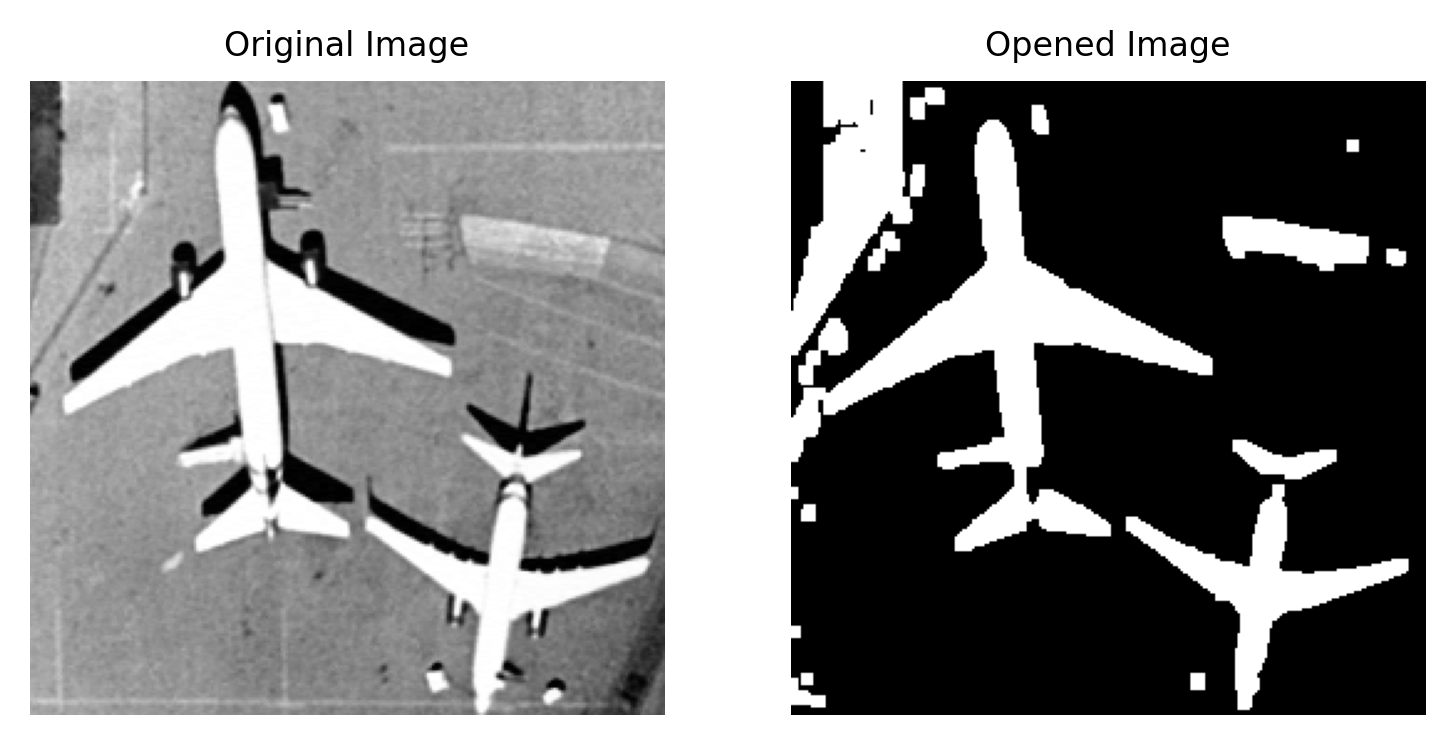

In [16]:
fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image', fontsize=8)

plt.subplot(122)
plt.imshow(opening, 'gray')
plt.axis('off')
plt.title('Opened Image', fontsize=8);

### Closing: Erosion after dilation

In [17]:
closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel, iterations = 1)

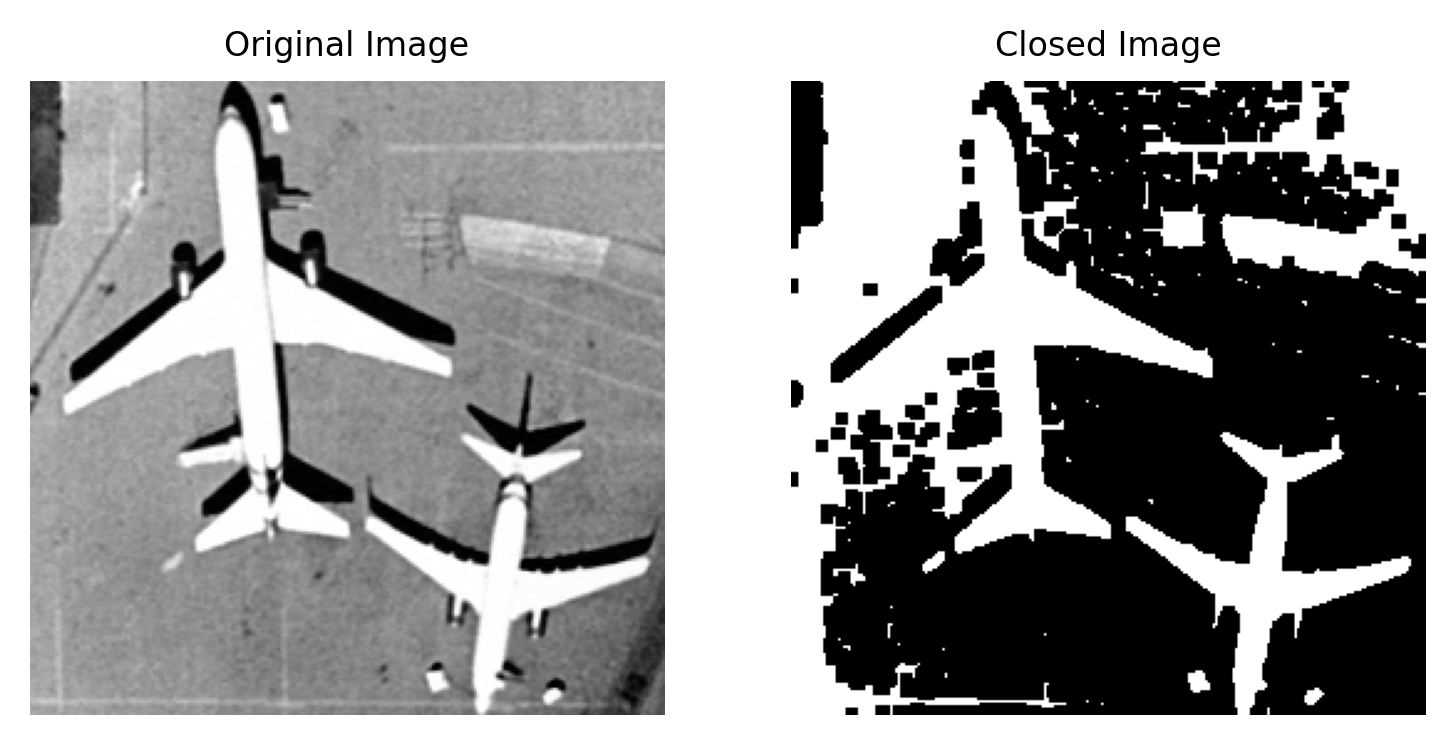

In [18]:
fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original Image', fontsize=8)

plt.subplot(122)
plt.imshow(closing, 'gray')
plt.axis('off')
plt.title('Closed Image', fontsize=8);

### Detecting the boundary

Difference between the dilated and eroded image

In [19]:
gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)

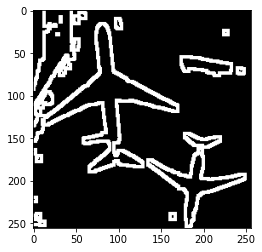

In [20]:
plt.imshow(gradient, cmap="gray");

### Trying different types of thresholding

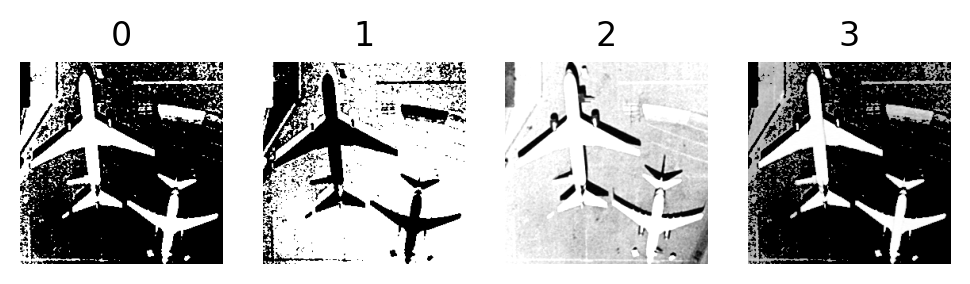

In [21]:
plt.figure(dpi=200)
plt.subplot(1,4,1)
rett, thress = cv2.threshold(img, 165, 255, 0)
plt.imshow(thress, cmap="gray")
plt.axis('off')
plt.title(0)
rett, thress = cv2.threshold(img, 165, 255, 1)
plt.subplot(1,4,2)
plt.imshow(thress, cmap="gray")
plt.axis('off')
plt.title(1)
rett, thress = cv2.threshold(img, 165, 255, 2)
plt.subplot(1,4,3)
plt.imshow(thress, cmap="gray")
plt.axis('off')
plt.title(2)
rett, thress = cv2.threshold(img, 165, 255, 3)
plt.subplot(1,4,4)
plt.imshow(thress, cmap="gray")
plt.axis('off')
plt.title(3);

# 0 - rett ke upar -> white, rett ke neecha -> black
# 1 - rett ke upar -> black, rett ke neeche -> white
# 2 - rett ke upar -> white, rett ke necche -> jaisa hain vaisa
# 3 - rett ke upar -> jaisa hain vaisa, rett ke necche -> black

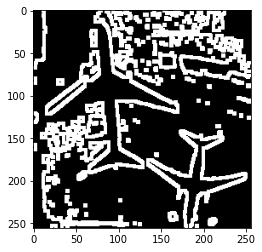

In [22]:
gradient_closing = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient_closing, cmap="gray");

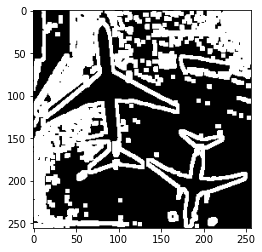

In [23]:
gradient_og = cv2.morphologyEx(thres, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient_og, cmap="gray");

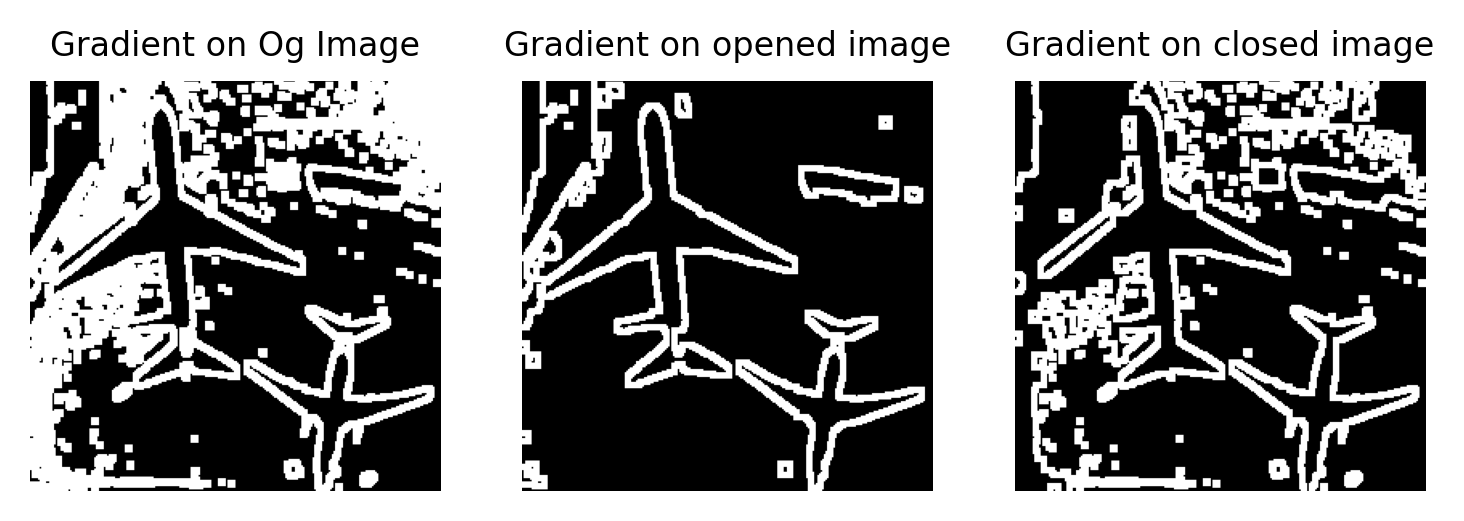

In [24]:
fig = plt.figure(dpi=300)
plt.subplot(131)
plt.imshow(gradient_og, 'gray')
plt.axis('off')
plt.title('Gradient on Og Image', fontsize=8)

plt.subplot(132)
plt.imshow(gradient, 'gray')
plt.axis('off')
plt.title('Gradient on opened image', fontsize=8)

plt.subplot(133)
plt.imshow(gradient_closing, 'gray')
plt.axis('off')
plt.title('Gradient on closed image', fontsize=8);